In [153]:
import yfinance as yf
import pandas as pd
import requests
from io import StringIO
import plotly.graph_objects as go
from bs4 import BeautifulSoup

Question 1 - Extracting Tesla Stock Data Using yfinance

Create ticker object for Tesla

In [178]:
tesla = yf.Ticker("TSLA")

Get historical stock prices

In [180]:
tesla_data = tesla.history(period="max")

Reset index

In [182]:
tesla_data.reset_index(inplace=True)

Show first 5 rows

In [184]:
tesla_data.head()

Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0

Question 2 - Extracting Tesla Revenue Data Using Webscraping

Tesla revenue data from Macrotrends

In [186]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

Read all tables in the page

In [188]:
headers = {"User-Agent": "Mozilla/5.0"}

# Sorğu göndəririk
response = requests.get(url, headers=headers)
html_data = StringIO(response.text)
# HTML-dən cədvəli oxuyuruq
tables = pd.read_html(html_data)


Select the correct table (usually the second one)

In [190]:
tesla_revenue = tables[1]

Rename columns

In [192]:
tesla_revenue.columns = ["Date", "Revenue"]

Drop any rows with missing Revenue

In [194]:
tesla_revenue.dropna(inplace=True)

Show first 5 rows

In [196]:
tesla_revenue.head()

Date  Revenue
0  2025-03-31  $19,335
1  2024-12-31  $25,707
2  2024-09-30  $25,182
3  2024-06-30  $25,500
4  2024-03-31  $21,301

Question 3 - Extracting GameStop Stock Data Using yfinance

Create a ticker object for GameStop

In [198]:
gme = yf.Ticker("GME")

Download historical stock data

In [200]:
gme_data = gme.history(period="max")

 Reset index to make 'Date' a column

In [202]:
gme_data.reset_index(inplace=True)

 Display the data

In [204]:
gme_data.head()

Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0

Question 4 - Extracting GameStop Revenue Data Using Webscraping:
Set the URL for GameStop revenue data

In [206]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0"}

Send a request to the URL

In [208]:
response = requests.get(url, headers=headers)

Wrap the HTML response with StringIO

In [210]:
html_data = StringIO(response.text)

Read all tables from the HTML

In [212]:
tables = pd.read_html(html_data)

Select the correct table (usually the second one)

In [214]:
gme_revenue = tables[1]

Rename the columns

In [216]:
gme_revenue.columns = ["Date", "Revenue"]

Drop rows with missing values

In [218]:
gme_revenue.dropna(inplace=True)

Display the data

In [220]:
gme_revenue.head()

Date Revenue
0  2025-01-31  $1,283
1  2024-10-31    $860
2  2024-07-31    $798
3  2024-04-30    $882
4  2024-01-31  $1,794

Question 5 - Tesla Stock and Revenue Dashboard :Create a figure for Tesla stock and revenue

In [222]:
fig = go.Figure()

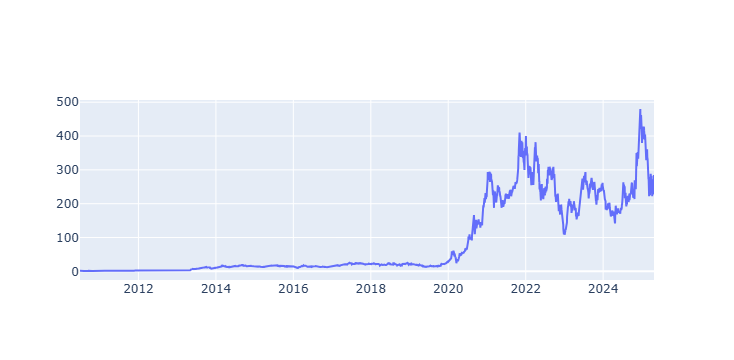

In [224]:
fig.add_trace(go.Scatter(x=tesla_data.Date, y=tesla_data.Close, name="Tesla Stock Price"))

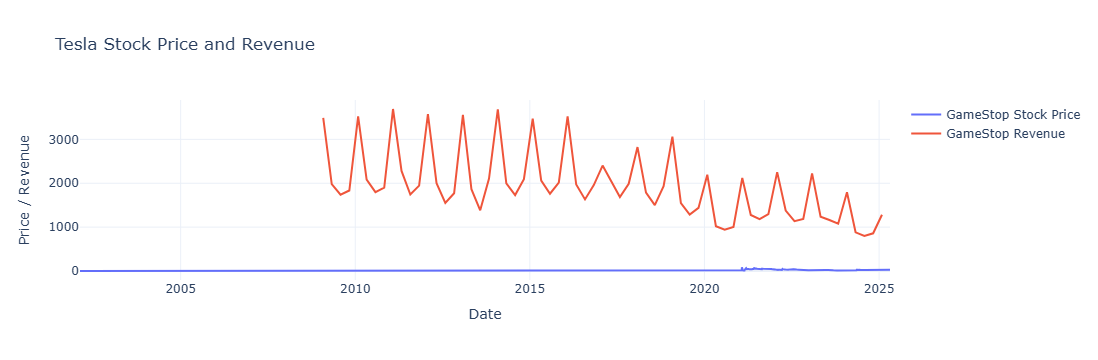

In [250]:
fig.update_layout(
    title="Tesla Stock Price and Revenue",
    xaxis_title="Date",
    yaxis_title="Price / Revenue",
    template="plotly_white")

Add Tesla revenue trace

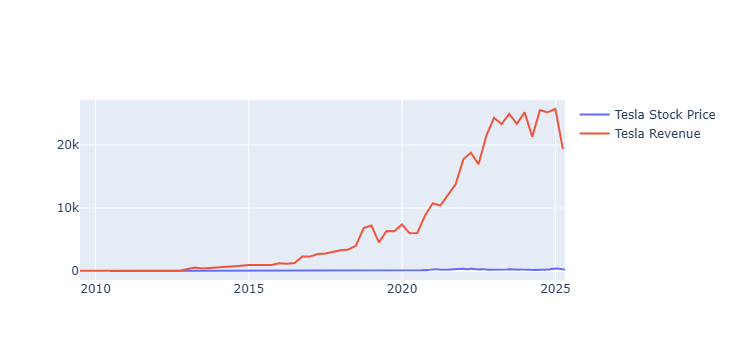

In [226]:
fig.add_trace(go.Scatter(x=tesla_revenue.Date, y=tesla_revenue.Revenue, name="Tesla Revenue"))

Show the figure

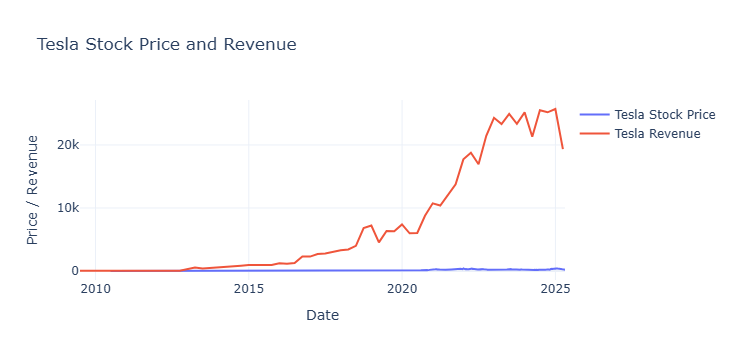

In [230]:
fig.show()

Question 6 - GameStop Stock and Revenue Dashboard

 Create a figure for GameStop stock and revenue

In [232]:
fig = go.Figure()

 Add GameStop stock price trace

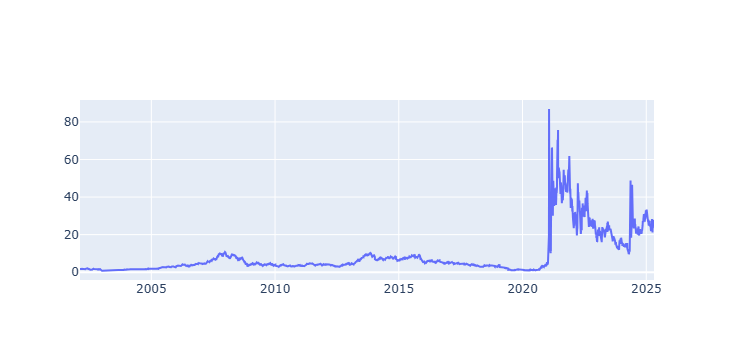

In [234]:
fig.add_trace(go.Scatter(x=gme_data.Date, y=gme_data.Close, name="GameStop Stock Price"))

Add GameStop revenue trace

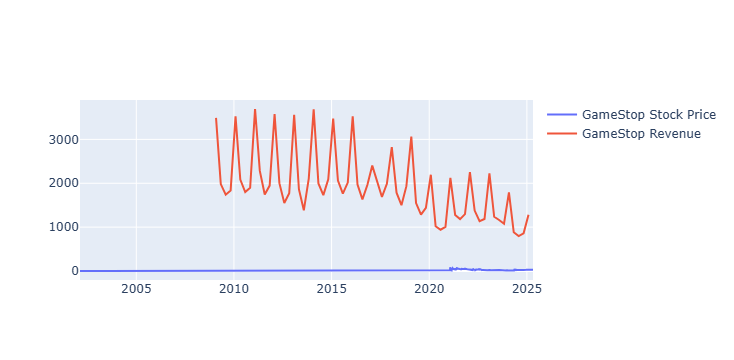

In [236]:
fig.add_trace(go.Scatter(x=gme_revenue.Date, y=gme_revenue.Revenue, name="GameStop Revenue"))

Update layout

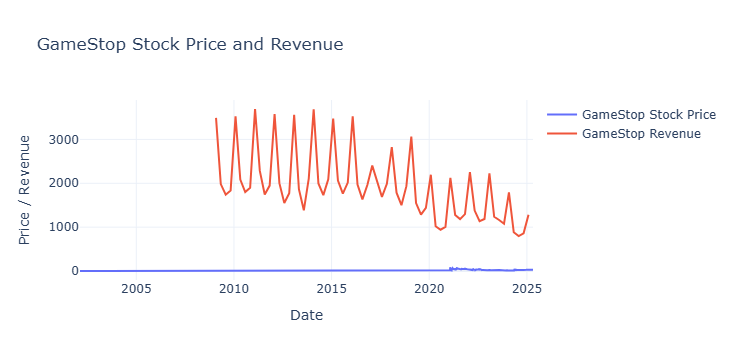

In [244]:
fig.update_layout(
    title="GameStop Stock Price and Revenue",
    xaxis_title="Date",
    yaxis_title="Price / Revenue",
    template="plotly_white"
)

Show the figure

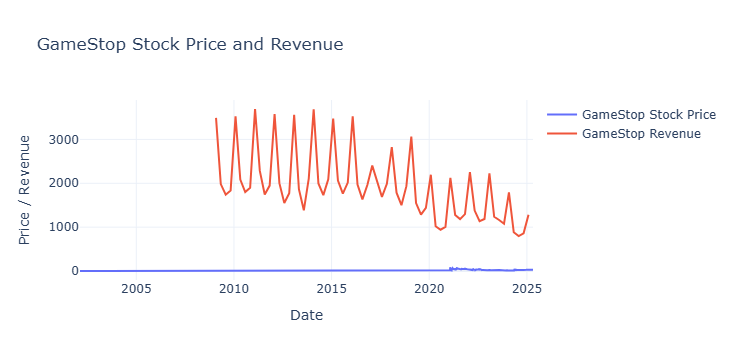

In [242]:
fig.show()